
# Part 1 - Building the CNN

# Importing the Keras libraries and packages

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Creating an Object of Sequential

In [3]:
classifier = Sequential()

# Step 1 - Convolution
# Convolution - input image, applying feature detectors => feature map
# 3D Array because colored images

In [4]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
# Feature Map - Take Max -> Pooled Feature Map, reduced size, reduce complexity
# without losing performance, don't lose spatial structure

In [5]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Adding second convolution layer
# don't need to include input_shape since we're done it

In [6]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

## Step 3 - Flattening
- Pooled Feature Maps apply flattening maps to a huge vector 
- for a future ANN that is fully-conntected
- Why don't we lose spatial structure by flattening?
- We don't because the high numbers from convolution feature from the feature detector
- Max Pooling keeps them these high numbers, and flattening keeps these high numbers
- Why didn't we take all the pixels and flatten into a huge vector?
- Only pixels of itself, but not how they're spatially structured around it
- But if we apply convolution and pooling, since feature map corresponds to each feature 
- of an image, specific image unique pixels, we keep the spatial structure of the picture.

In [7]:
classifier.add(Flatten())

# Step 4 - Full Connection

In [8]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile - SGD, Loss Function, Performance Metric
# Logarithmic loss - binary cross entropy, more than two outcomes, categorical cross entropy
# Metrics is the accuracy metric

```py
Adam optimizer.

Default parameters follow those provided in the original paper.

Arguments

learning_rate: float >= 0. Learning rate.
beta_1: float, 0 < beta < 1. Generally close to 1.
beta_2: float, 0 < beta < 1. Generally close to 1.
amsgrad: boolean. Whether to apply the AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and Beyond".
```

In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## part 2 - Fitting the CNN to the images 
## Keras preprocessing images to prevent overfitting, image augmentation, 
- great accuracy on training poor results on test sets
- Need lots of images to find correlations, patterns in pixels
- Find patterns in pixels, 10000 images, 8000 training, not much exactly or use a trick
- Image augmentation will create batches and each batch will create random transformation
- leading to more diverse images and more training
- Image augmentation allows us to enrich our dataset to prevent overfitting



In [10]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Data/Train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('Data/Test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Traing and Testing on the Images

In [11]:
'''
classifier.fit_generator(training_set,
                        samples_per_epoch=8000,
                        nb_epoch=1,
                        validation_data=test_set,
                        nb_val_samples=2000)
'''
classifier.fit_generator(training_set,
                        steps_per_epoch = 250,
                        nb_epoch=25,
                        validation_data=test_set)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=250, validation_data=<keras.pre..., epochs=25)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/25
250/250 [==============================] - 89s 357ms/step - loss: 0.6497 - accuracy: 0.6104 - val_loss: 0.6302 - val_accuracy: 0.6715
Epoch 2/25
250/250 [==============================] - 55s 219ms/step - loss: 0.5823 - accuracy: 0.6982 - val_loss: 0.3140 - val_accuracy: 0.7130
Epoch 3/25
250/250 [==============================] - 55s 221ms/step - loss: 0.5439 - accuracy: 0.7182 - val_loss: 0.8190 - val_accuracy: 0.7525
Epoch 4/25
250/250 [==============================] - 58s 231ms/step - loss: 0.5060 - accuracy: 0.7466 - val_loss: 0.4290 - val_accuracy: 0.7815
Epoch 5/25
250/250 [==============================] - 54s 216ms/step - loss: 0.4835 - accuracy: 0.7684 - val_loss: 0.8042 - val_accuracy: 0.7755
Epoch 6/25
250/250 [==============================] - 54s 215ms/step - loss: 0.4652 - accuracy: 0.7771 - val_loss: 0.4998 - val_accuracy: 0.7760
Epoch 7/25
250/250 [==============================] - 56s 225ms/step - loss: 0.4561 - accuracy: 0.7855 - val_loss: 0.7321 - val_ac

# Testing Image

Image 1 is a dog
Image 2 is a cat
Image 3 is a dog
Image 4 is a dog
Image 5 is a cat
Image 6 is a cat
Image 7 is a cat
Image 8 is a dog
Image 9 is a dog
Image 10 is a dog
Image 11 is a dog


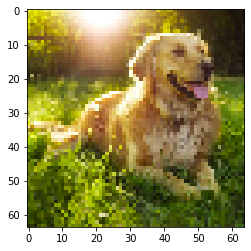

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
for i in range(1,12):
    test_image = image.load_img('Data/Prediction/image' + str(i) + '.jpg', target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    #plt.imshow(test_image/255.)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    if result[0][0] == 1: 
        prediction = 'dog'
    else:
        prediction = 'cat'
    print('Image ' + str(i) + ' is a ' + prediction)

    
plt.show()
